# Linearly Separable Data Generation and Visualization

This section demonstrates the process of generating a **linearly separable dataset** and visualizing it. The dataset consists of two classes (`Class 0` and `Class 1`) that can be separated by a straight line. This dataset is suitable for training a perceptron model.

## Description of the Dataset
1. **Class 0**:
   - Consists of 50 points.
   - Points are shifted upwards and to the right.
   - Represented in blue on the plot.

2. **Class 1**:
   - Consists of 50 points.
   - Points are shifted downwards and to the left.
   - Represented in red on the plot.

3. **Features**:
   - The dataset is 2-dimensional, making it easy to visualize.

## Purpose
This dataset will later be used:
- To train a perceptron model for binary classification.
- To visualize the decision boundary created by the perceptron.

## Visualization
The scatter plot below shows the data points for each class. The separation between `Class 0` and `Class 1` is visually apparent, confirming that the data is linearly separable.

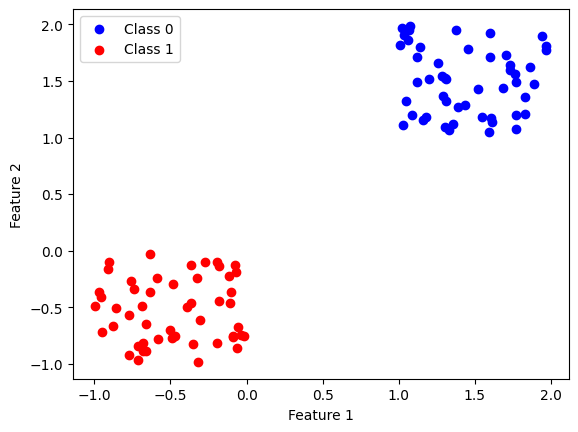

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate linearly separable data
np.random.seed(42)  # Set random seed for reproducibility
class_0 = np.random.rand(50, 2) + 1  # Points for Class 0
class_1 = np.random.rand(50, 2) - 1  # Points for Class 1
X_linear = np.vstack((class_0, class_1))  # Combine both classes
y_linear = np.array([0] * 50 + [1] * 50)  # Labels for the data (0 and 1)

# Visualize the generated data
plt.scatter(X_linear[:50, 0], X_linear[:50, 1], color='blue', label='Class 0')  # Class 0 points
plt.scatter(X_linear[50:, 0], X_linear[50:, 1], color='red', label='Class 1')  # Class 1 points
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()  # Add legend to distinguish classes
plt.show()  # Display the plot

# Non-Linearly Separable Data Generation and Visualization

This section demonstrates the creation of a **non-linearly separable dataset** using the `make_moons` function from the `sklearn.datasets` module. The dataset consists of two classes (`Class 0` and `Class 1`) arranged in a crescent-shaped (moon-like) structure, making them non-linearly separable.

## Description of the Dataset
- **Class 0**:
  - Points forming the first crescent shape.
  - Represented in blue on the plot.

- **Class 1**:
  - Points forming the second crescent shape.
  - Represented in red on the plot.

- **Features**:
  - The dataset is 2-dimensional for ease of visualization.

## Purpose
This dataset will later be used:
1. To train an **MLP (Multilayer Perceptron)** for binary classification.
2. To evaluate how well the MLP can model non-linear decision boundaries.

## Visualization
The scatter plot below shows the data points for each class. The crescent-like structure makes it evident that a simple linear classifier (like a perceptron) will not be sufficient to separate these classes.

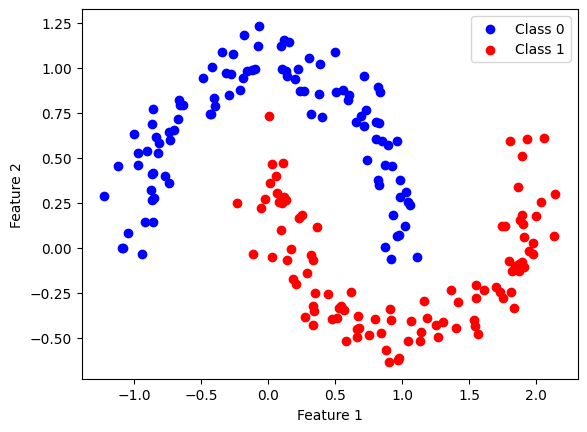

In [4]:
from sklearn.datasets import make_moons

# Generate non-linearly separable data
X_non_linear, y_non_linear = make_moons(n_samples=200, noise=0.1, random_state=42)  # Non-linear crescent-shaped data

# Visualize the generated data
plt.scatter(X_non_linear[y_non_linear == 0, 0], X_non_linear[y_non_linear == 0, 1], color='blue', label='Class 0')  # Class 0 points
plt.scatter(X_non_linear[y_non_linear == 1, 0], X_non_linear[y_non_linear == 1, 1], color='red', label='Class 1')  # Class 1 points
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()  # Add legend to distinguish classes
plt.show()  # Display the plot


# Splitting Data into Training and Testing Sets

To evaluate the performance of our models, we divide the datasets into **training** and **testing** subsets. This ensures that the models are trained on one part of the data and tested on unseen data to measure generalization.

## Why Split the Data?
1. **Training Set**:
   - Used to train the model and optimize its parameters.
   - Consists of 80% of the dataset in this example.

2. **Testing Set**:
   - Used to evaluate the model's performance on unseen data.
   - Consists of 20% of the dataset in this example.

3. **Random State**:
   - A fixed `random_state` ensures reproducibility, meaning the split will always produce the same subsets.

In [5]:
from sklearn.model_selection import train_test_split

# Linear data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42)

# Non-linear data
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(
    X_non_linear, y_non_linear, test_size=0.2, random_state=42)

# Perceptron Training and Testing

This section demonstrates the process of initializing, training, and testing a perceptron model on a linearly separable dataset. The perceptron is a simple linear classifier that adjusts its weights iteratively based on the training data.

## Steps:
1. **Initialization**:
   - The perceptron is initialized with:
     - Learning rate (`eta`): Controls the step size during weight updates.
     - Maximum epochs (`max_epochs`): The maximum number of iterations through the training data.
     - Error threshold (`threshold`): Determines when to stop training based on error reduction.

2. **Training**:
   - The perceptron is trained on the training data (`X_train_linear`, `y_train_linear`).
   - It iteratively adjusts its weights to minimize classification error.

3. **Testing**:
   - The trained perceptron is evaluated on the test data (`X_test_linear`, `y_test_linear`).
   - The model’s accuracy on unseen data is calculated and displayed.

Initialize the perceptron

In [6]:
from perceptron import PerceptronAlgorithm

# Initialize the perceptron
perceptron = PerceptronAlgorithm(eta=0.01, max_epochs=1000, threshold=0.01)

Train the perceptron and Plot results of training

Epoch  1  ===> error =  [0.35] ... 

Epoch  2  ===> error =  [0.0625] ... 

Epoch  3  ===> error =  [0.01875] ... 

Epoch  4  ===> error =  [0.0125] ... 

Epoch  5  ===> error =  [0.] ... 



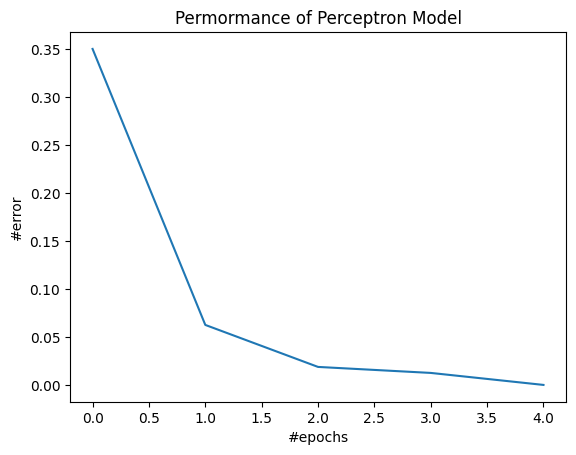

In [7]:
perceptron.fit(X_train_linear, y_train_linear)

plt.plot(range(len(perceptron.cost_)), perceptron.cost_)
plt.title("Permormance of Perceptron Model")
plt.xlabel("#epochs")
plt.ylabel("#error")
plt.show()

Check the decision boundary of perceptron

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Define the boundaries
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    # Predictions for each point in the grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Draw the contours
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot the training points
    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == classe, 0],
            y=X[y == classe, 1],
            alpha=0.8,
            color=cmap(idx),
            marker=markers[idx],
            label=classe
        )


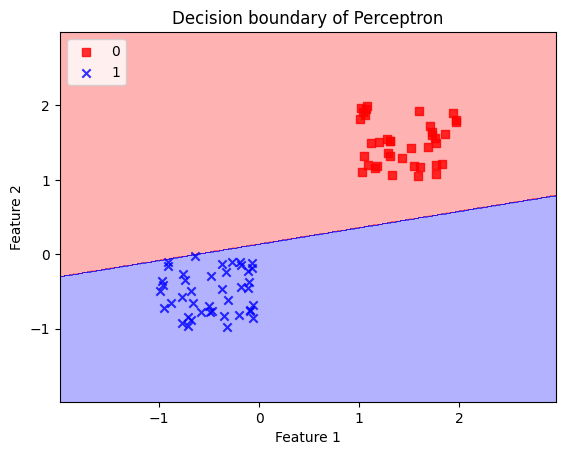

In [9]:
plot_decision_regions(X_train_linear, y_train_linear, classifier=perceptron)
plt.legend(loc='upper left')
plt.title('Decision boundary of Perceptron')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Test the perceptron

In [10]:
y_pred_linear = perceptron.test(X_test_linear, y_test_linear)
print("Accuracy for Perceptron:", perceptron.accuracy)

Accuracy for Perceptron: 100.0


Metrics for Perceptron

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test_linear, y_pred_linear)
precision = precision_score(y_test_linear, y_pred_linear)
recall = recall_score(y_test_linear, y_pred_linear)
f1 = f1_score(y_test_linear, y_pred_linear)
cm = confusion_matrix(y_test_linear, y_pred_linear)

print("Metrics for Perceptron:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Metrics for Perceptron:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]


Explicit the model

In [12]:
# Print the Perceptron classifier model
print("Perceptron classifier model:")
print(f"output = {perceptron.b[0]:.4f} + {perceptron.w[0]:.4f} * Feature_1 + {perceptron.w[1]:.4f} * Feature_2")

Perceptron classifier model:
output = 0.5516 + 0.0842 * Feature_1 + -0.3823 * Feature_2


In [13]:
# Predict class for a new point
new_point = np.array([0.5, -0.5])  # Example new point
pred = perceptron.predict(new_point)
print("Predicted class for point [0.5, -0.5]:", pred)

Predicted class for point [0.5, -0.5]: [1]


# Multilayer Perceptron (MLP) Training and Testing

This section demonstrates the process of initializing, training, and testing a **Multilayer Perceptron (MLP)** on a **non-linearly separable dataset**. The MLP is capable of learning non-linear decision boundaries, making it suitable for more complex tasks like the `make_moons` dataset used here.

## Steps:
1. **Initialization**:
   - The MLP is initialized with:
     - Learning rate (`eta`): Controls the step size during weight updates.
     - Threshold (`threshold`): Determines the stopping condition based on error reduction.
     - Maximum epochs (`max_epochs`): Limits the number of iterations through the training data.

2. **Architecture Definition**:
   - The MLP architecture is built with:
     - `input_length`: Number of input features (dimensionality of the dataset).
     - `hidden_length`: Number of neurons in the hidden layer (set to 10 in this example).
     - `output_length`: Number of output neurons (1 for binary classification).

3. **Training**:
   - The MLP is trained on the non-linear training dataset (`X_train_non_linear`, `y_train_non_linear`) using backpropagation.

4. **Testing**:
   - The trained MLP is evaluated on the test dataset (`X_test_non_linear`, `y_test_non_linear`).
   - Accuracy is calculated as the percentage of correctly classified test samples.

#Initializing the MLP

Building the architecture,  Training the MLP, Testing the MLP



In [14]:

import numpy as np
import matplotlib.pyplot as plt
from mlp import MLPAlgorithm


mlp = MLPAlgorithm(eta=0.01, threshold=0.01, max_epochs=1000)


mlp.build_architecture(
    input_length=X_train_non_linear.shape[1],  # Number of input features
    hidden_length=10,                         # Number of neurons in the hidden layer
    output_length=1                           # Number of output neurons (binary classification)
)


mlp.fit(X_train_non_linear, y_train_non_linear)

# Test the MLP
y_pred_non_linear = mlp.test(X_test_non_linear, y_test_non_linear)
print("Accuracy for MLP:", mlp.accuracy)

Epoch  100 : loss =  0.06497
Epoch  200 : loss =  0.05006
Epoch  300 : loss =  0.04639
Epoch  400 : loss =  0.04544
Epoch  500 : loss =  0.04513
Epoch  600 : loss =  0.04499
Epoch  700 : loss =  0.0449
Epoch  800 : loss =  0.04482
Epoch  900 : loss =  0.04474
Epoch  1000 : loss =  0.04465
Accuracy for MLP: 90.0



# Generating non-linearly separable data

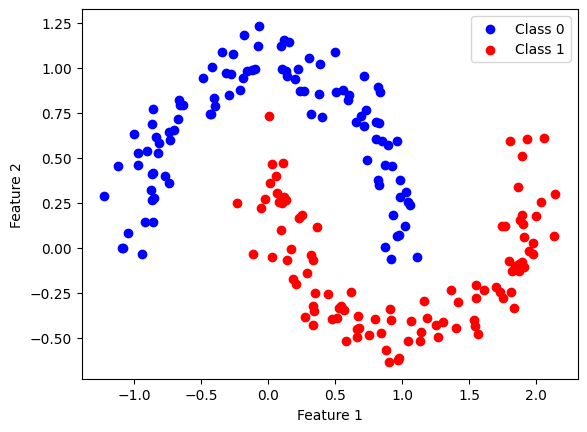

In [16]:


from sklearn.datasets import make_moons

X_non_linear, y_non_linear = make_moons(n_samples=200, noise=0.1, random_state=42)  # Non-linear crescent-shaped data

# Visualize the generated data
plt.scatter(X_non_linear[y_non_linear == 0, 0], X_non_linear[y_non_linear == 0, 1], color='blue', label='Class 0')  # Class 0 points
plt.scatter(X_non_linear[y_non_linear == 1, 0], X_non_linear[y_non_linear == 1, 1], color='red', label='Class 1')  # Class 1 points
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()  # Add legend to distinguish classes
plt.show()  # Display the plot

Metrics for MLP


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


accuracy = accuracy_score(y_test_non_linear, y_pred_non_linear)
precision = precision_score(y_test_non_linear, y_pred_non_linear)
recall = recall_score(y_test_non_linear, y_pred_non_linear)
f1 = f1_score(y_test_non_linear, y_pred_non_linear)
cm = confusion_matrix(y_test_non_linear, y_pred_non_linear)

print("Metrics for MLP:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Metrics for MLP:
Accuracy: 0.9
Precision: 0.9375
Recall: 0.8333333333333334
F1 Score: 0.8823529411764706
Confusion Matrix:
 [[21  1]
 [ 3 15]]


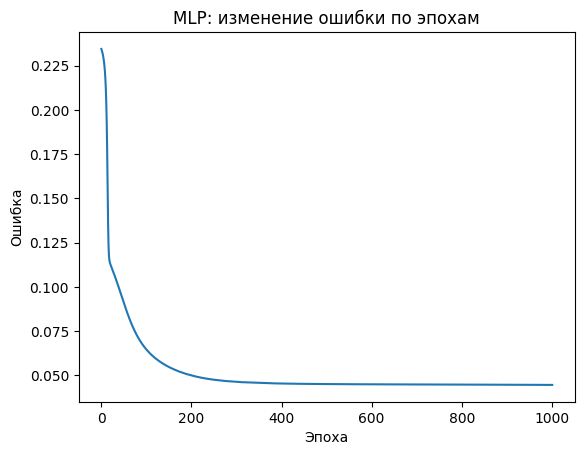

In [18]:
plt.plot(range(len(mlp.cost_)), mlp.cost_)
plt.title("MLP: изменение ошибки по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка")
plt.show()


In [ ]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    
    # Create the grid for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predictions for the grid
    Z = np.array([classifier.predict(np.array([xi, yi]))[1] for xi, yi in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    # Set up the background
    custom_cmap = ListedColormap(['blue', 'red'])  # Синий для класса 0, красный для класса 1
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)

    # Colors for points
    scatter_colors = {0: 'blue', 1: 'red'}
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    color=scatter_colors[label], label=f'Class {label}',
                    edgecolor='k', s=50)

    plt.legend()

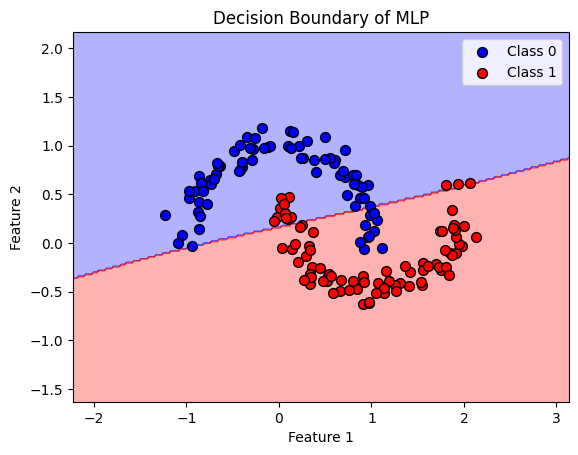

In [20]:
plot_decision_regions(X_train_non_linear, y_train_non_linear, classifier=mlp)
plt.title('Decision Boundary of MLP')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Test the MLP

In [21]:

y_pred_non_linear = mlp.test(X_test_non_linear, y_test_non_linear)
print("Accuracy for MLP:", mlp.accuracy)

Accuracy for MLP: 90.0


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


accuracy = accuracy_score(y_test_non_linear, y_pred_non_linear)
precision = precision_score(y_test_non_linear, y_pred_non_linear)
recall = recall_score(y_test_non_linear, y_pred_non_linear)
f1 = f1_score(y_test_non_linear, y_pred_non_linear)
cm = confusion_matrix(y_test_non_linear, y_pred_non_linear)

print("Metrics for MLP:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Metrics for MLP:
Accuracy: 0.9
Precision: 0.9375
Recall: 0.8333333333333334
F1 Score: 0.8823529411764706
Confusion Matrix:
 [[21  1]
 [ 3 15]]


In [23]:
print("MLP classifier model:")

print("\nHidden layer parameters:")
for i in range(mlp.hidden_length):
    print(f"Neuron {i+1}: output = {mlp.bh[i]:.4f} + " +
          " + ".join([f"{mlp.Wh[i, j]:.4f} * Feature_{j+1}" for j in range(X_train_non_linear.shape[1])]))

print("\nOutput layer parameters:")
for i in range(mlp.output_length):
    print(f"output = {mlp.bo[i]:.4f} + " +
          " + ".join([f"{mlp.Wo[i, j]:.4f} * Hidden_Neuron_{j+1}" for j in range(mlp.hidden_length)]))

MLP classifier model:

Hidden layer parameters:
Neuron 1: output = 0.3570 + 0.9797 * Feature_1 + 0.4009 * Feature_2
Neuron 2: output = 0.1087 + -0.3193 * Feature_1 + 1.0457 * Feature_2
Neuron 3: output = 0.3282 + 0.5101 * Feature_1 + -1.8113 * Feature_2
Neuron 4: output = 0.4125 + -0.3645 * Feature_1 + 1.4929 * Feature_2
Neuron 5: output = -0.2290 + 0.6030 * Feature_1 + 1.8939 * Feature_2
Neuron 6: output = 0.6558 + 0.1148 * Feature_1 + 1.0374 * Feature_2
Neuron 7: output = 0.2636 + -0.2610 * Feature_1 + 1.3228 * Feature_2
Neuron 8: output = 0.9708 + 0.9727 * Feature_1 + -0.1666 * Feature_2
Neuron 9: output = 0.6401 + 0.7406 * Feature_1 + -0.5842 * Feature_2
Neuron 10: output = 0.4922 + 0.5128 * Feature_1 + -1.8097 * Feature_2

Output layer parameters:
output = -0.0098 + -0.0927 * Hidden_Neuron_1 + -1.0292 * Hidden_Neuron_2 + 2.4072 * Hidden_Neuron_3 + -1.4424 * Hidden_Neuron_4 + -1.8172 * Hidden_Neuron_5 + -0.6522 * Hidden_Neuron_6 + -1.2788 * Hidden_Neuron_7 + 0.8034 * Hidden_Neuron_

# Going through hidden layers

In [24]:
new_point = np.array([0.5, -0.5])


hidden_input = np.dot(new_point, mlp.Wh.T) + mlp.bh  # взвешенная сумма
hidden_output = 1 / (1 + np.exp(-hidden_input))  # применяем сигмоидальную активацию

output_input = np.dot(hidden_output, mlp.Wo.T) + mlp.bo # Проходим через выходной слой
output = 1 / (1 + np.exp(-output_input))

pred = 1 if output >= 0.5 else 0

print("Predicted class for point [0.5, -0.5]:", pred)

Predicted class for point [0.5, -0.5]: 1
